In [190]:
!pip install xgboost
!pip install matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [191]:
%matplotlib inline

In [192]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# Load data
df = pd.read_csv('finalalldata.csv')
df

,uid,label,sex,age,bmi,smoke,location,rs10007052,rs8192288,rs20541,rs12922394,rs2910164,rs161976,rs473892,rs159497,rs9296092,class
0,copdcontrol1,0,2,28,19.22,0,4.63,1.671,1.0000,0.448632,0.42328,1.000,1.000,1.473000,1.000000,1.0,train
1,copdcontrol69,0,1,53,20.44,0,4.63,1.671,1.0000,1.000000,0.65060,1.416,1.000,1.000000,1.000000,1.0,train
2,copdcontrol68,0,1,58,20.45,1,4.63,1.000,1.0000,0.669800,1.00000,1.416,1.000,1.473000,1.000000,1.0,train
3,copdcontrol85,0,2,30,20.70,0,4.63,1.671,1.0000,0.448632,1.00000,1.416,NaN,1.473000,1.000000,1.0,train
4,copdcontrol78,0,1,55,20.76,1,4.63,1.671,1.0000,0.669800,0.65060,1.000,1.000,1.473000,2.088025,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,BT1901190482HMSWX,1,1,76,25.95,0,8.60,1.000,1.0000,1.000000,1.00000,1.000,1.000,2.169729,1.000000,1.0,validate
629,BT1901190472HMSWX,1,1,71,25.95,1,8.60,1.000,1.0000,0.669800,1.00000,1.416,1.594,1.000000,1.445000,1.0,validate
630,BT1812220593HMSWX,1,1,84,27.54,1,8.60,1.671,0.5927,1.000000,1.00000,1.416,1.000,1.473000,NaN,1.0,validate
631,BT1812240022LMSBS,1,1,79,27.55,1,8.60,1.000,1.0000,1.000000,1.00000,1.416,1.000,1.473000,1.445000,1.0,validate


In [194]:
# Set up the figure size
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'BMI')

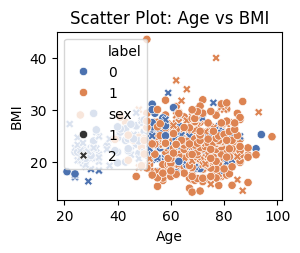

In [195]:
# Scatter Plot: Age vs. BMI
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='age', y='bmi', hue='label', style='sex', palette='deep')
plt.title('Scatter Plot: Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

In [196]:
# Impute missing values: numeric columns with mean, categorical with mode
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical column
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numeric column
        df[column].fillna(df[column].mean(), inplace=True)

C:\Users\DIVYASHREE\AppData\Local\Temp\ipykernel_6360\1996983796.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\DIVYASHREE\AppData\Local\Temp\ipykernel_6360\1996983796.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [197]:
# Check if there are any remaining missing values
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 uid           0
label         0
sex           0
age           0
bmi           0
smoke         0
location      0
rs10007052    0
rs8192288     0
rs20541       0
rs12922394    0
rs2910164     0
rs161976      0
rs473892      0
rs159497      0
rs9296092     0
class         0
dtype: int64


In [198]:
print("Data Shape:", df.shape)

Data Shape: (633, 17)


In [199]:
print("Label Counts:\n", df['label'].value_counts())

Label Counts:
 label
1    441
0    192
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

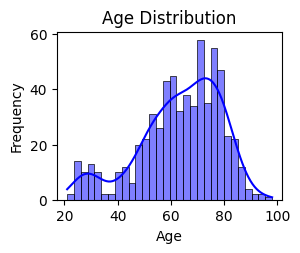

In [206]:
# Histogram: Age Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [169]:
# Prepare features and target variable
X = df.drop(['uid', 'label', 'class'], axis=1)
y = df['label']

In [170]:
df.describe()

,label,sex,age,bmi,smoke,location,rs10007052,rs8192288,rs20541,rs12922394,rs2910164,rs161976,rs473892,rs159497,rs9296092
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,0.696682,1.271722,63.417062,23.190724,0.631912,6.617678,1.391994,0.891881,0.804953,0.859815,1.406741,1.255722,1.299271,1.337422,1.185820
std,0.460055,0.445199,15.369700,3.661055,0.482667,1.523725,0.507373,0.188053,0.198385,0.184158,0.347626,0.376657,0.336951,0.362754,0.486958
min,0.000000,1.000000,21.000000,14.300000,0.000000,4.630000,1.000000,0.351293,0.448632,0.423280,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,55.000000,20.730000,0.000000,5.310000,1.000000,0.592700,0.669800,0.650600,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,66.000000,23.030000,1.000000,6.880000,1.000000,1.000000,0.669800,1.000000,1.416000,1.000000,1.473000,1.445000,1.000000
75%,1.000000,2.000000,75.000000,25.240000,1.000000,7.780000,1.671000,1.000000,1.000000,1.000000,1.416000,1.594000,1.473000,1.445000,1.000000
max,1.000000,2.000000,98.000000,43.560000,1.000000,8.720000,2.792241,1.000000,1.000000,1.000000,2.005056,2.540836,2.169729,2.088025,3.356224


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
df.columns

Index(['uid', 'label', 'sex', 'age', 'bmi', 'smoke', 'location', 'rs10007052',
       'rs8192288', 'rs20541', 'rs12922394', 'rs2910164', 'rs161976',
       'rs473892', 'rs159497', 'rs9296092', 'class'],
      dtype='object')

In [173]:
# Initialize and fit the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

C:\Users\DIVYASHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:13:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [174]:
# Check shapes of the training data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (506, 14)
y_train shape: (506,)


In [175]:
# Prediction and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [176]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 89.76%


In [141]:
print("Please provide the following details for COPD prediction:")
age = int(input("Enter age: "))
sex = int(input("Enter sex (1 for male, 2 for female): "))
bmi = float(input("Enter BMI: "))
smoke = int(input("Do you smoke? (1 for Yes, 0 for No): "))
location = float(input("Enter location score (e.g., 4.63): "))

Please provide the following details for COPD prediction:


Enter age:  60
Enter sex (1 for male, 2 for female):  1
Enter BMI:  30.5
Do you smoke? (1 for Yes, 0 for No):  1
Enter location score (e.g., 4.63):  5.31


In [177]:
genetic_values = df.loc[0, ['rs10007052', 'rs8192288', 'rs20541', 'rs12922394', 'rs2910164', 'rs161976', 'rs473892', 'rs159497', 'rs9296092']].values

In [178]:
# Prepare input data for prediction
input_data = np.array([[age, sex, bmi, smoke, location] + list(genetic_values)])
input_df = pd.DataFrame(input_data, columns=X.columns)

In [179]:
# Make prediction
prediction = model.predict(input_df)
probability = model.predict_proba(input_df)[:, 1]

In [180]:
# Output result
result = "has COPD" if prediction[0] == 1 else "does not have COPD"
print(f"Input Details: Age: {age}, Sex: {sex}, BMI: {bmi}, Smoke: {smoke}, Location: {location}, Genetic Values: {genetic_values}")
print(f"Prediction: The person {result}.")
print(f"Accuracy of the model: {accuracy * 100:.2f}%")
print(f"Probability of having COPD: {probability[0] * 100:.2f}%")

Input Details: Age: 60, Sex: 1, BMI: 30.5, Smoke: 1, Location: 5.31, Genetic Values: [1.671 1.0 0.44863204 0.42328036 1.0 1.0 1.473 1.0 1.0]
Prediction: The person does not have COPD.
Accuracy of the model: 89.76%
Probability of having COPD: 1.40%
